In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
ed = tfp.edward2
import sys
sys.path.append("../")
from future_features import tape
import numpy as np
%load_ext autoreload
%autoreload 2

/home/folzd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt

In [3]:
from tfpmodels import *
from mapper import Mapper

/home/folzd/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/folzd/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [41]:
sess = tf.InteractiveSession()

/home/folzd/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [74]:
#lrmog_data = Mapper(mixtureOfGaussians, 'lrmog',observed_variable_names=['data'])
lrmog_data = Mapper(projectedMixtureOfGaussians, 'lrmog',observed_variable_names=['data'], n_components = 5, n_sources = 1, n_features = 2, mixture_component_means_var=1000.)

In [75]:
gen_data = sess.run(lrmog_data.tape['data'])

In [76]:
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

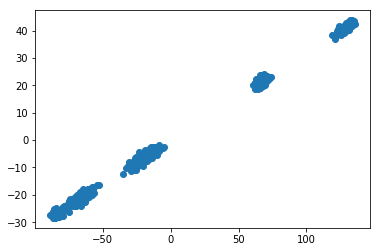

In [77]:
#fig = plt.figure()
#ax= fig.add_subplot(111, projection='3d')
#ax.scatter(*gen_data.T)
plt.scatter(*gen_data.T)

In [78]:
lrmog_data.variable_names

['factor_loadings',
 'mixture_weights',
 'mixture_component_means',
 'mixture_component_covariances_cholesky',
 'data_var']

In [79]:
lrmog_data.variables

{'factor_loadings': <tf.Tensor 'lrmog/factor_loadings/read:0' shape=(1, 2) dtype=float64>,
 'mixture_weights': <tf.Tensor 'lrmog_9/softmax_centered/forward/Reshape_1:0' shape=(5,) dtype=float64>,
 'mixture_component_means': <tf.Tensor 'lrmog/mixture_component_means/read:0' shape=(5, 1) dtype=float64>,
 'mixture_component_covariances_cholesky': <tf.Tensor 'lrmog_9/scale_tril/forward/transform_diagonal/forward/MatrixSetDiag:0' shape=(5, 1, 1) dtype=float64>,
 'data_var': <tf.Tensor 'lrmog_9/scaled_sigmoid/forward/affine_scalar/forward/add:0' shape=() dtype=float64>}

In [11]:
lrmog_data.unconstrained_variables

{'factor_loadings': <tf.Variable 'lrmog/factor_loadings:0' shape=(1, 2) dtype=float64_ref>,
 'mixture_weights': <tf.Variable 'lrmog/mixture_weights:0' shape=(4,) dtype=float64_ref>,
 'mixture_component_means': <tf.Variable 'lrmog/mixture_component_means:0' shape=(5, 1) dtype=float64_ref>,
 'mixture_component_covariances_cholesky': <tf.Variable 'lrmog/mixture_component_covariances_cholesky:0' shape=(5, 1) dtype=float64_ref>,
 'data_var': <tf.Variable 'lrmog/data_var:0' shape=() dtype=float64_ref>}